# House Price Prediction Project

### Problem Statement
##### The goal of this project is to build a predictive model to estimate house prices based on various features such as house area, number of bedrooms and bathrooms, presence of amenities (like air conditioning, hot water heating, guest rooms, etc.), and proximity to a main road.

### Dataset Description

#### The key features of the dataset include:

- Price: The target variable representing the price of the house.
- Area: The total area of the house.
- Bedrooms: The number of bedrooms in the house.
- Bathrooms: The number of bathrooms.
- Stories: The number of stories the house has.
- Main Road: Whether the house is connected to a main road.
- Guest Room: Whether the house has a guest room.
- Basement: Whether the house has a basement.
- Hot Water Heating: Whether the house has a hot water heater.
- Air Conditioning: Whether the house has air conditioning.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import shap

In [2]:
#read the data from the file and store its content in pandas dataframe
df=pd.read_csv("D:/Datasets/Housing.csv")

### Data Exploration

In [3]:
#displaying the first few rows of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# displays last few rows of the dataset
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
#Displaying the shape of the dataset
print(f'The total rows in the dataset are: {df.shape[0]}')
print(f'The total columns in the dataset are: {df.shape[1]}')

The total rows in the dataset are: 545
The total columns in the dataset are: 13


In [6]:
#checks the data types and missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
#Checking the no. of unique values in each column
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [8]:
categorical_cols = df.select_dtypes(include='object').columns

# Loop through each categorical column and print the value counts as a list
for col in categorical_cols:
    print(f"{df[col].value_counts()}")
    print('-----------------------------')

mainroad
yes    468
no      77
Name: count, dtype: int64
-----------------------------
guestroom
no     448
yes     97
Name: count, dtype: int64
-----------------------------
basement
no     354
yes    191
Name: count, dtype: int64
-----------------------------
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
-----------------------------
airconditioning
no     373
yes    172
Name: count, dtype: int64
-----------------------------
prefarea
no     417
yes    128
Name: count, dtype: int64
-----------------------------
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64
-----------------------------


In [9]:
#Displaying the numerical statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [10]:
#Displaying the data types for different columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

### Data Cleaning

In [11]:
#check for duplicated rows
duplicated_rows=df.duplicated().sum()
print("The number of duplicated rows are:",duplicated_rows)

The number of duplicated rows are: 0


In [12]:
# Finding out the percentage of missing values in the dataset.
missing_values_percent=df.isna().sum()/len(df)*100
print(missing_values_percent)

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64


In [13]:
df['price']=df['price']/1000000 #Now, prices will be interpreted in millions, as the original values were quite large

### INSIGHTS
- There were no duplicates and missing values in the dataset
- All the columns had the correct data types .
- Ensuring that the dataset is cleaned .

### Exploratory Data Analysis

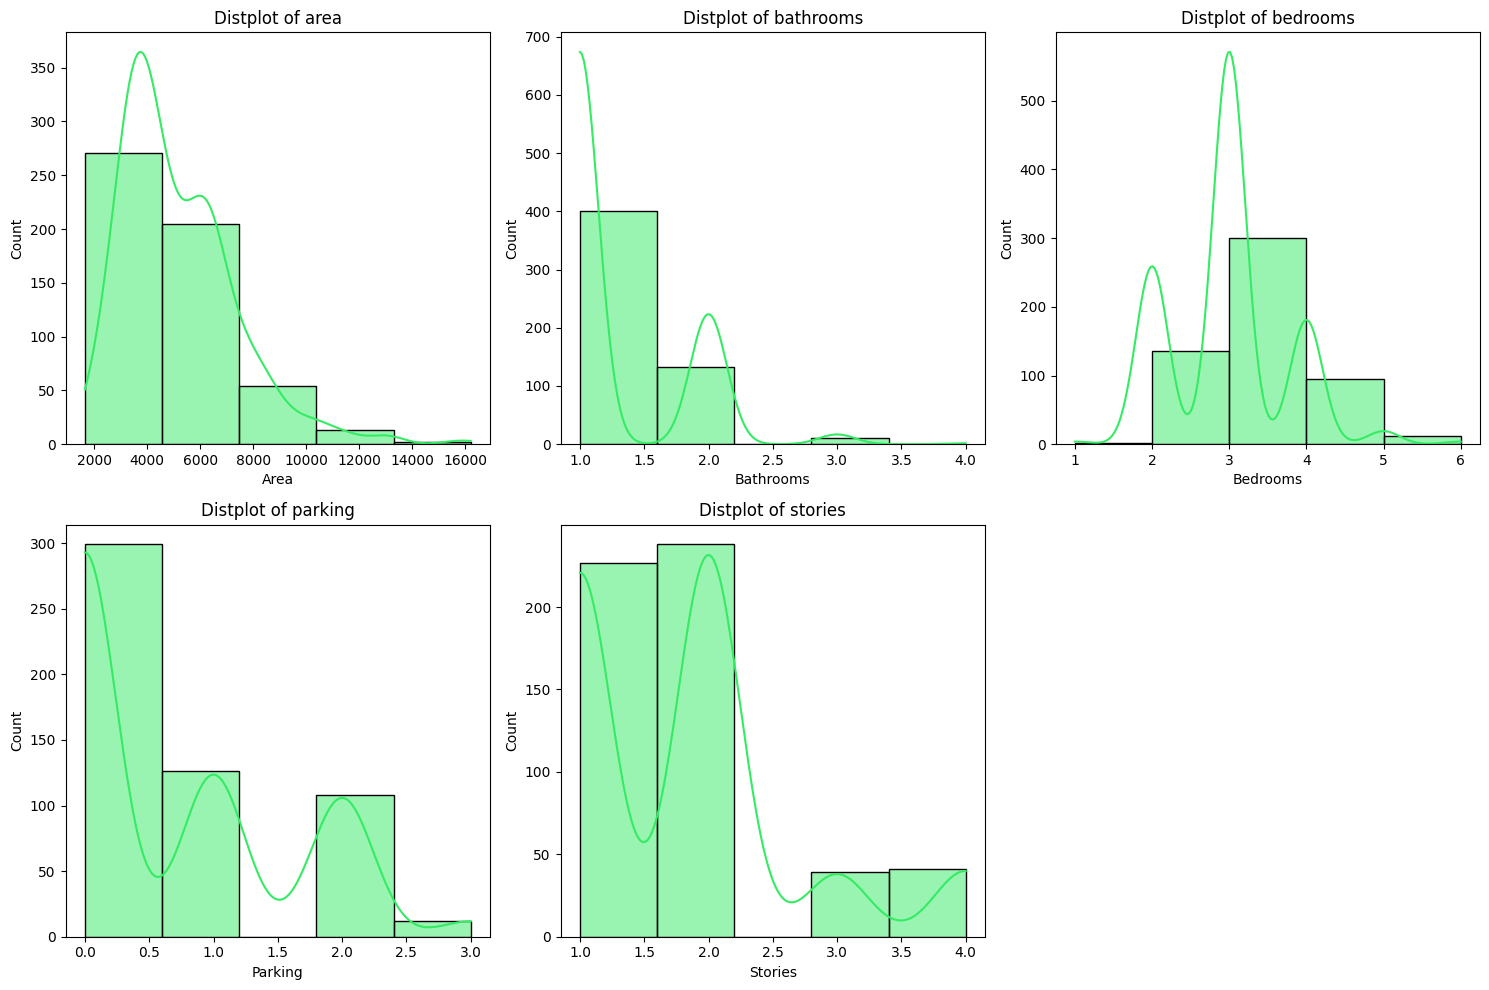

In [14]:
# Select numerical columns, excluding 'price'
numerical_cols = df.select_dtypes(include=np.number).columns.difference(['price'])

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot each column separately
for i, col in enumerate(numerical_cols):
    row = i // 3  # Determines row number
    cols = i % 3  # Determines column number
    sns.histplot(df[col], bins=5, kde=True, color='#34eb64', ax=axes[row, cols], edgecolor='black')
    axes[row, cols].set_title(f'Distplot of {col}')
    axes[row, cols].set_xlabel(col.capitalize())
    axes[row, cols].set_ylabel('Count')

# Remove empty subplot (if any)
fig.delaxes(axes[1, 2])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [15]:
# This function calculates the skewness of numerical columns in a DataFrame.
def calculate_skew(df):
    skewness_values = df[numerical_cols].skew()
    return skewness_values
    
skewness = calculate_skew(df)
print(skewness)

area         1.321188
bathrooms    1.589264
bedrooms     0.495684
parking      0.842062
stories      1.082088
dtype: float64


### INSIGHTS
- The columns like area,bathrooms and stories are highly positively skewed .
- The column parking is moderately postively skewed whereas the column bedroom is almost symmetric .

##### performing log transformations on to the numerical columns as they are highly postively skewed.

In [16]:
df['area'] = np.log1p(df['area'])
df['bathrooms'] = np.log1p(df['bathrooms'])
df['parking'] = np.log1p(df['parking'])
df['stories'] = np.log1p(df['stories'])

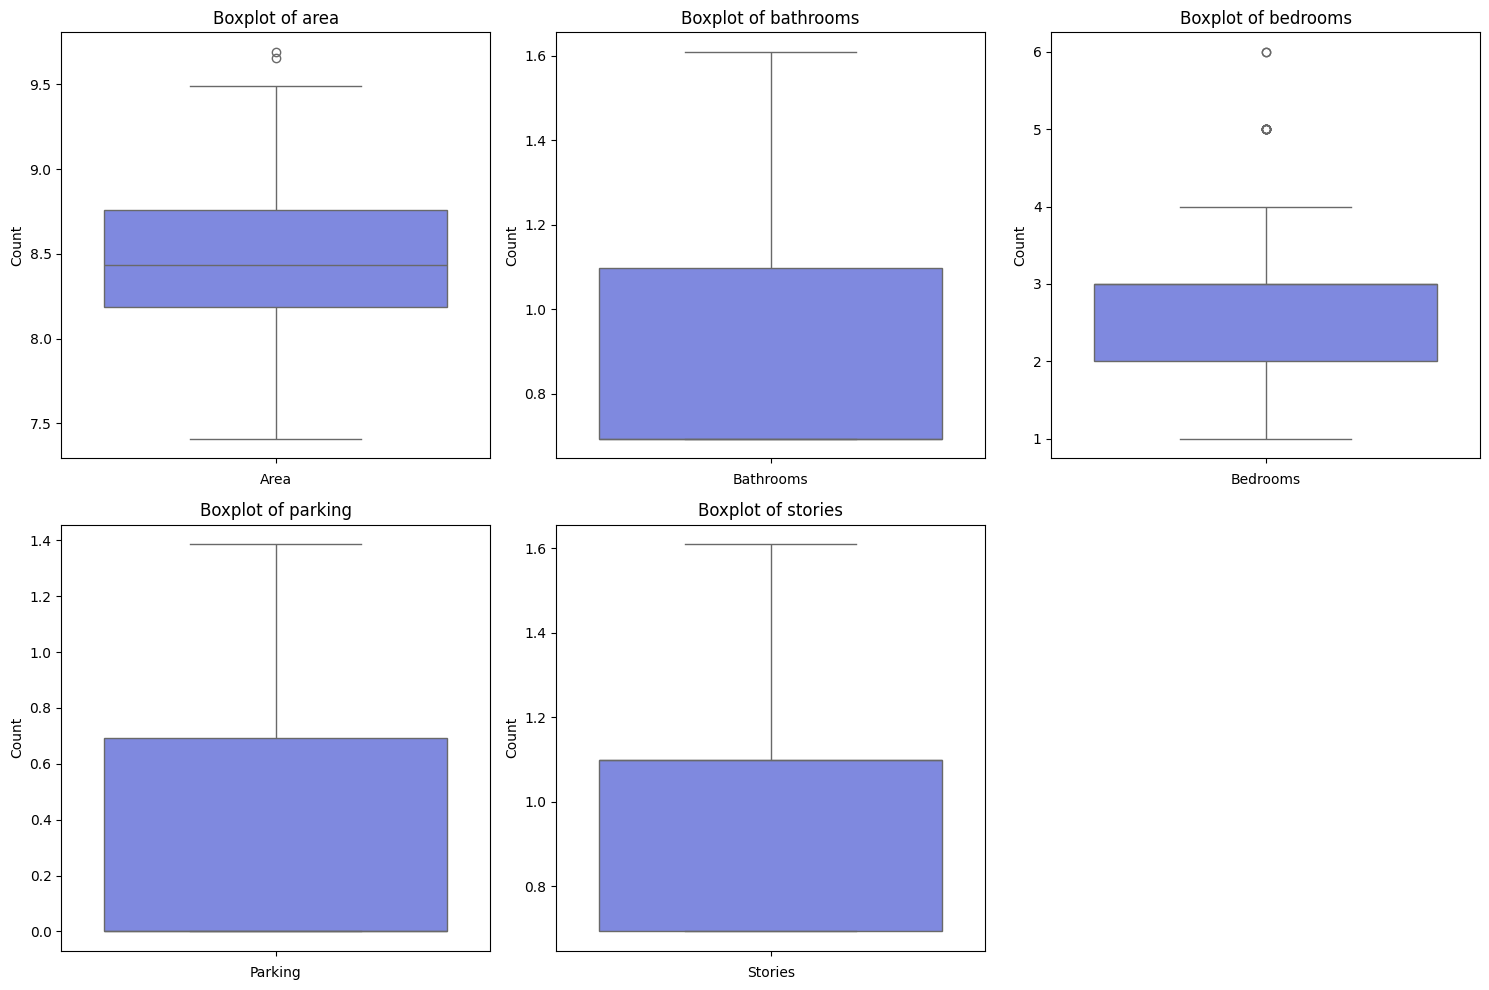

In [17]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot each column separately
for i, col in enumerate(numerical_cols):
    row = i // 3  # Determines row number
    cols = i % 3  # Determines column number
    sns.boxplot(df[col], color='#6F7CEF', ax=axes[row, cols])
    axes[row, cols].set_title(f'Boxplot of {col}')
    axes[row, cols].set_xlabel(col.capitalize())
    axes[row, cols].set_ylabel('Count')

# Remove empty subplot (if any)
fig.delaxes(axes[1, 2])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [18]:
# This observation was one of the reason to cause outliers in the bedroom,bathroom,stories and parking column
df[df['bathrooms']==4]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


##### Upon analysis,the outliers seems valid so will not remove these outliers and moreover I also don't have information about where the data came from or how it was collected, so I can’t do any extra checks on these outliers. For now,I will keep them as they might provide useful insights.

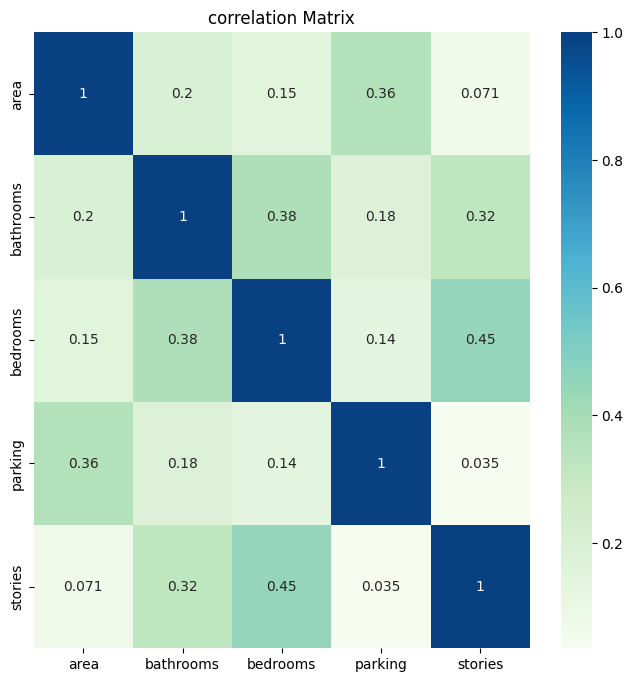

In [19]:
#Checking correlation between columns
plt.figure(figsize=(8,8))
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap='GnBu')
plt.title("correlation Matrix")
plt.show()

### INSIGHTS
- Bedrooms and Stories have a weak positive corelation.
- Bathrooms and Stories column also have a weak positive corelation same as area and parking .

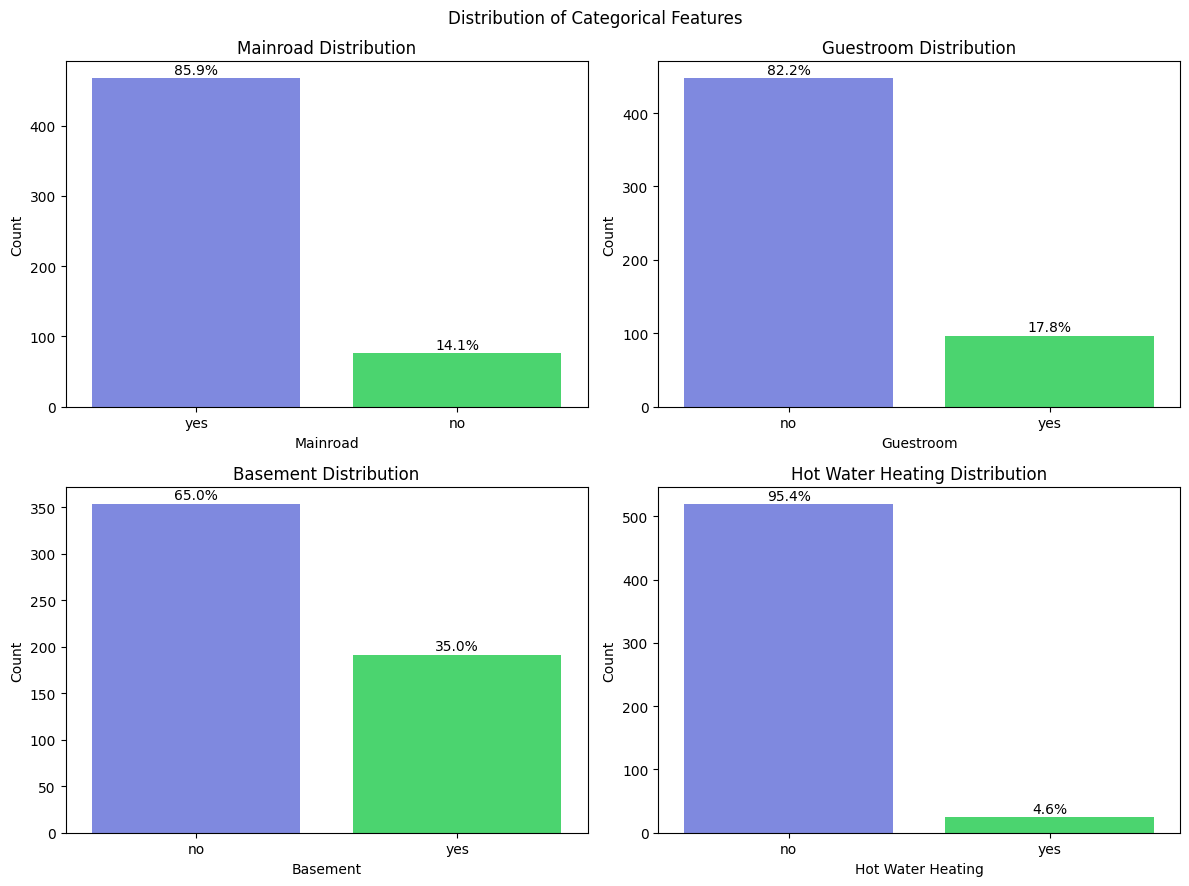

In [20]:
# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# Function to add percentage labels to count plots
def add_percentages(ax):
    total = len(df)
    for patch in ax.patches:
        height = patch.get_height()
        percentage = (height / total) * 100
        ax.text(patch.get_x() + patch.get_width() / 2., height + 0.01 * total,
                f'{percentage:.1f}%', ha='center')

# Plot for mainroad
sns.countplot(ax=axes[0, 0], x='mainroad', palette=['#6F7CEF','#34eb64'], data=df)
axes[0, 0].set_title('Mainroad Distribution')
axes[0, 0].set_xlabel('Mainroad')
axes[0, 0].set_ylabel('Count')
add_percentages(axes[0, 0])

# Plot for guestroom
sns.countplot(ax=axes[0, 1], x='guestroom', palette=['#6F7CEF','#34eb64'], data=df)
axes[0, 1].set_title('Guestroom Distribution')
axes[0, 1].set_xlabel('Guestroom')
axes[0, 1].set_ylabel('Count')
add_percentages(axes[0, 1])

# Plot for basement
sns.countplot(ax=axes[1, 0], x='basement', palette=['#6F7CEF','#34eb64'], data=df)
axes[1, 0].set_title('Basement Distribution')
axes[1, 0].set_xlabel('Basement')
axes[1, 0].set_ylabel('Count')
add_percentages(axes[1, 0])

# Plot for hotwaterheating
sns.countplot(ax=axes[1, 1], x='hotwaterheating', palette=['#6F7CEF','#34eb64'], data=df)
axes[1, 1].set_title('Hot Water Heating Distribution')
axes[1, 1].set_xlabel('Hot Water Heating')
axes[1, 1].set_ylabel('Count')
add_percentages(axes[1, 1])

plt.suptitle("Distribution of Categorical Features")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


### INSIGHT
- Approx 86% of houses in the dataset were built on the mainroad
- However, it is difficult to find houses having guestroom ,basement and hotwater heating.

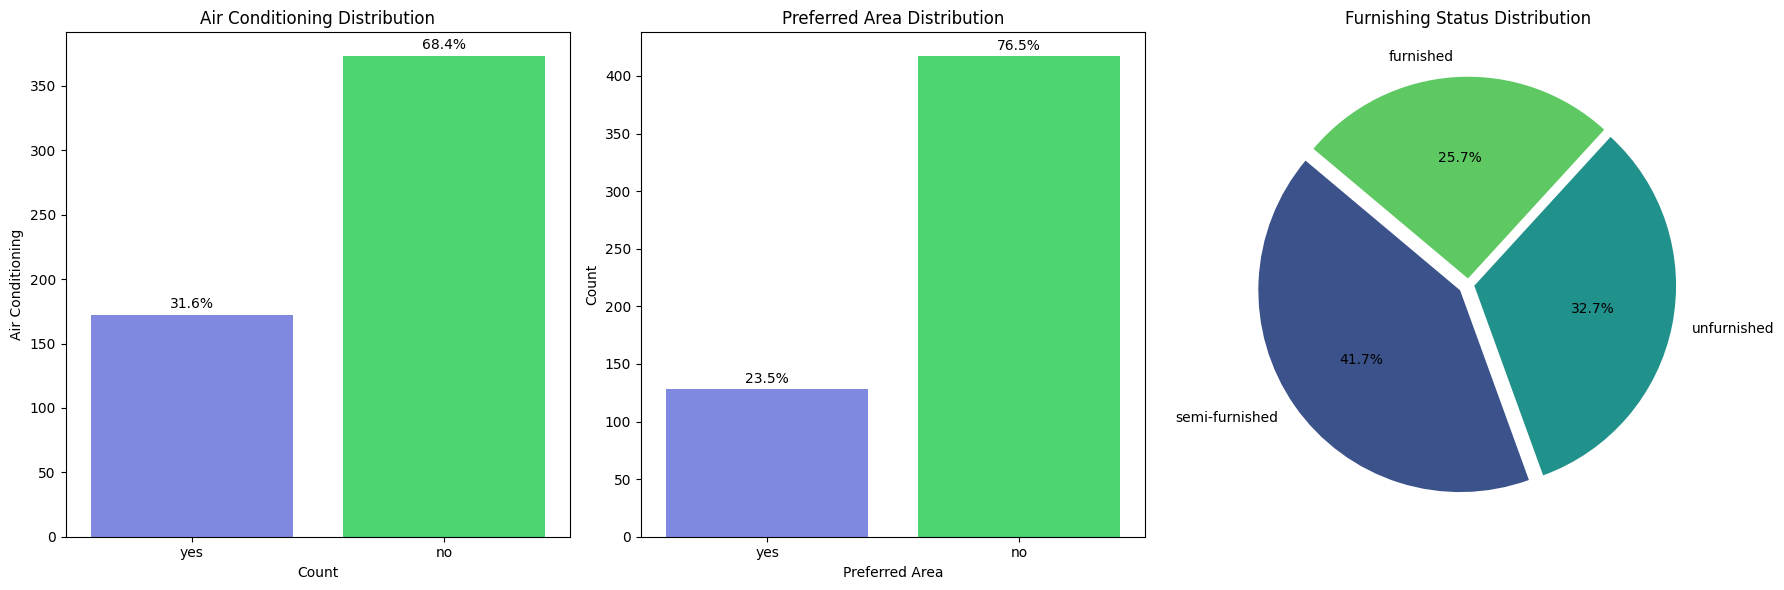

In [21]:
# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for airconditioning (vertical count plot)
sns.countplot(ax=axes[0], x='airconditioning', palette=['#6F7CEF','#34eb64'], data=df)
axes[0].set_title('Air Conditioning Distribution')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Air Conditioning')
add_percentages(axes[0])

# Plot for prefarea (horizontal count plot)
sns.countplot(ax=axes[1], x='prefarea', palette=['#6F7CEF','#34eb64'], data=df)
axes[1].set_title('Preferred Area Distribution')
axes[1].set_xlabel('Preferred Area')
axes[1].set_ylabel('Count')
add_percentages(axes[1])
# Prepare data for pie chart
furnishing_status_counts = df['furnishingstatus'].value_counts()
labels=furnishing_status_counts.index

# Plot for furnishingstatus (pie chart)
axes[2].pie(furnishing_status_counts.values, labels=labels, autopct='%1.1f%%', startangle=140,explode=[0.05,0.03,0.03], colors=sns.color_palette('viridis', len(labels)))
axes[2].set_title('Furnishing Status Distribution')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

### INSIGHTS
- About 31.6% of the houses contain air conditioning.
- A significant number of houses are not located in the preferred area. 
- The 41.7% of houses were semi-furnished means additional costs  on furnishing houses and only about 25% houses were furnished.

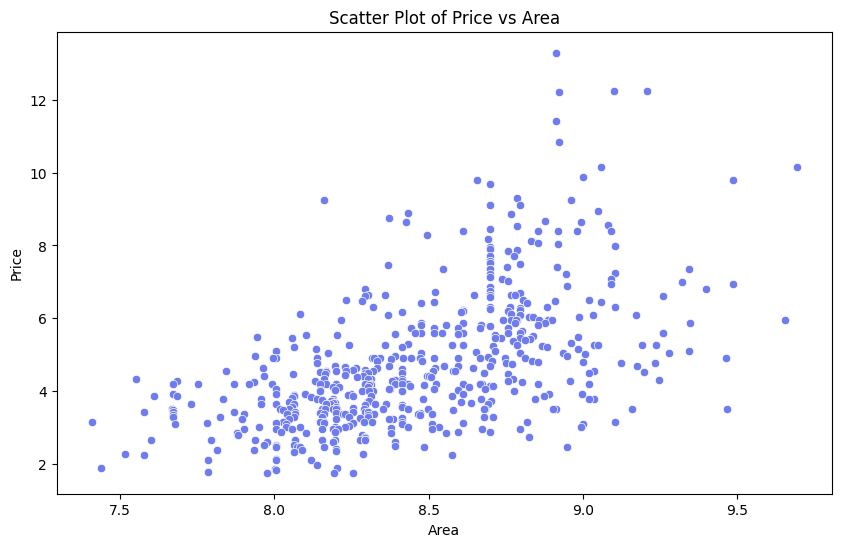

In [22]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['area'], y=df['price'], color='#6F7CEF')
plt.title('Scatter Plot of Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

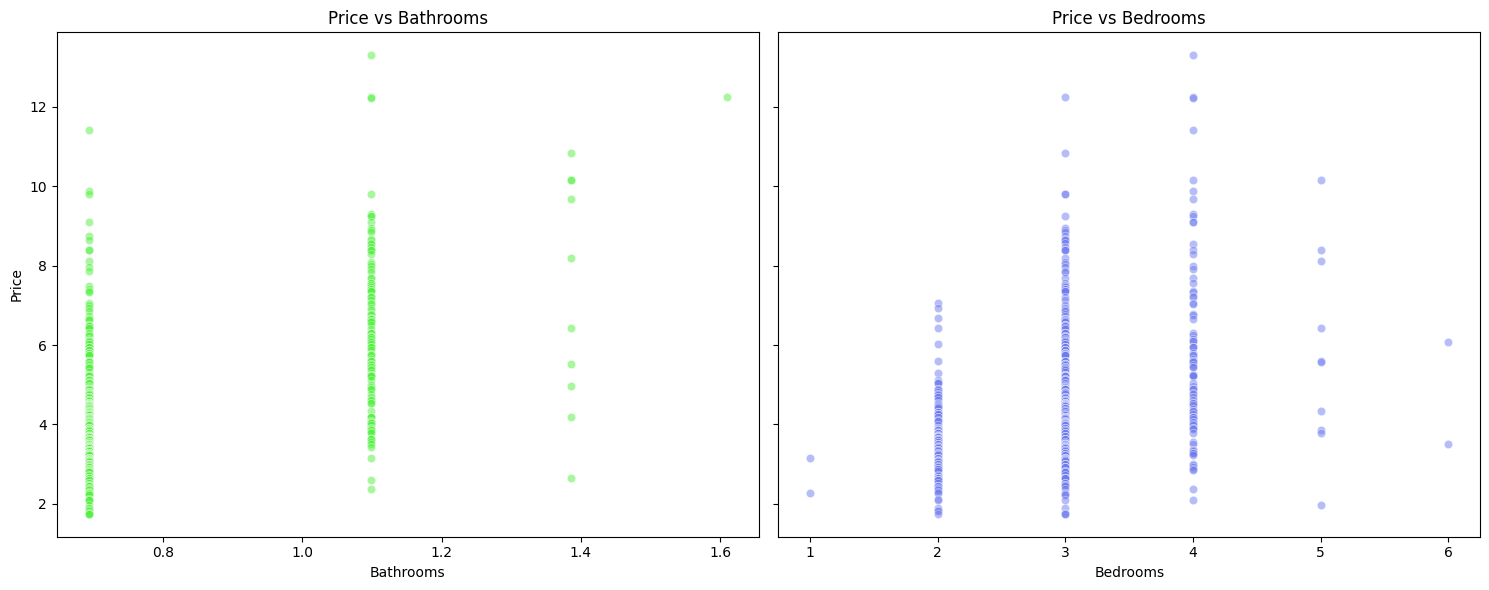

In [23]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Scatter plot for 'bathrooms'
sns.scatterplot(x=df['bathrooms'], y=df['price'], color='#52F13F', ax=axes[0],alpha=0.5)
axes[0].set_title('Price vs Bathrooms')
axes[0].set_xlabel('Bathrooms')
axes[0].set_ylabel('Price')

# Scatter plot for 'bedrooms'
sns.scatterplot(x=df['bedrooms'], y=df['price'], color='#6F7CEF', ax=axes[1],alpha=0.5)
axes[1].set_title('Price vs Bedrooms')
axes[1].set_xlabel('Bedrooms')
axes[1].set_ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()

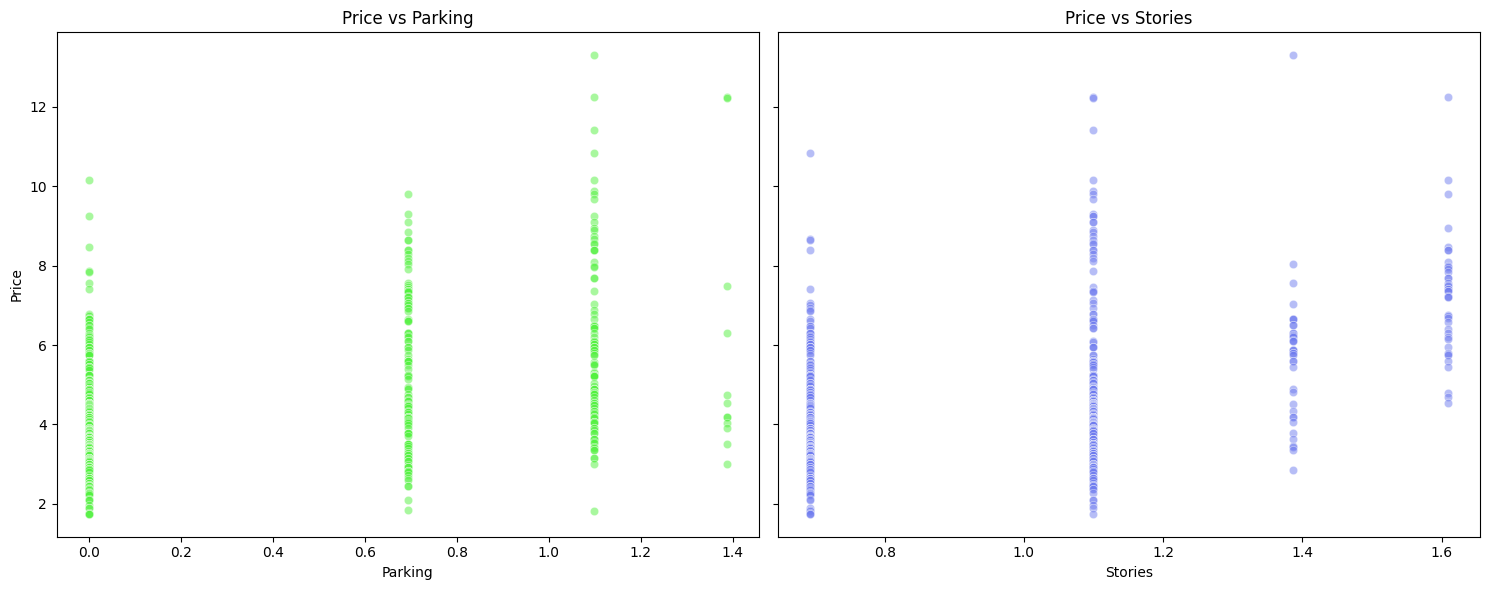

In [24]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Scatter plot for 'bathrooms'
sns.scatterplot(x=df['parking'], y=df['price'], color='#52F13F',alpha=0.5 ,ax=axes[0])
axes[0].set_title('Price vs Parking')
axes[0].set_xlabel('Parking')
axes[0].set_ylabel('Price')

# Scatter plot for 'bedrooms'
sns.scatterplot(x=df['stories'], y=df['price'], color='#6F7CEF',alpha=0.5, ax=axes[1])
axes[1].set_title('Price vs Stories')
axes[1].set_xlabel('Stories')
axes[1].set_ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 700x700 with 0 Axes>

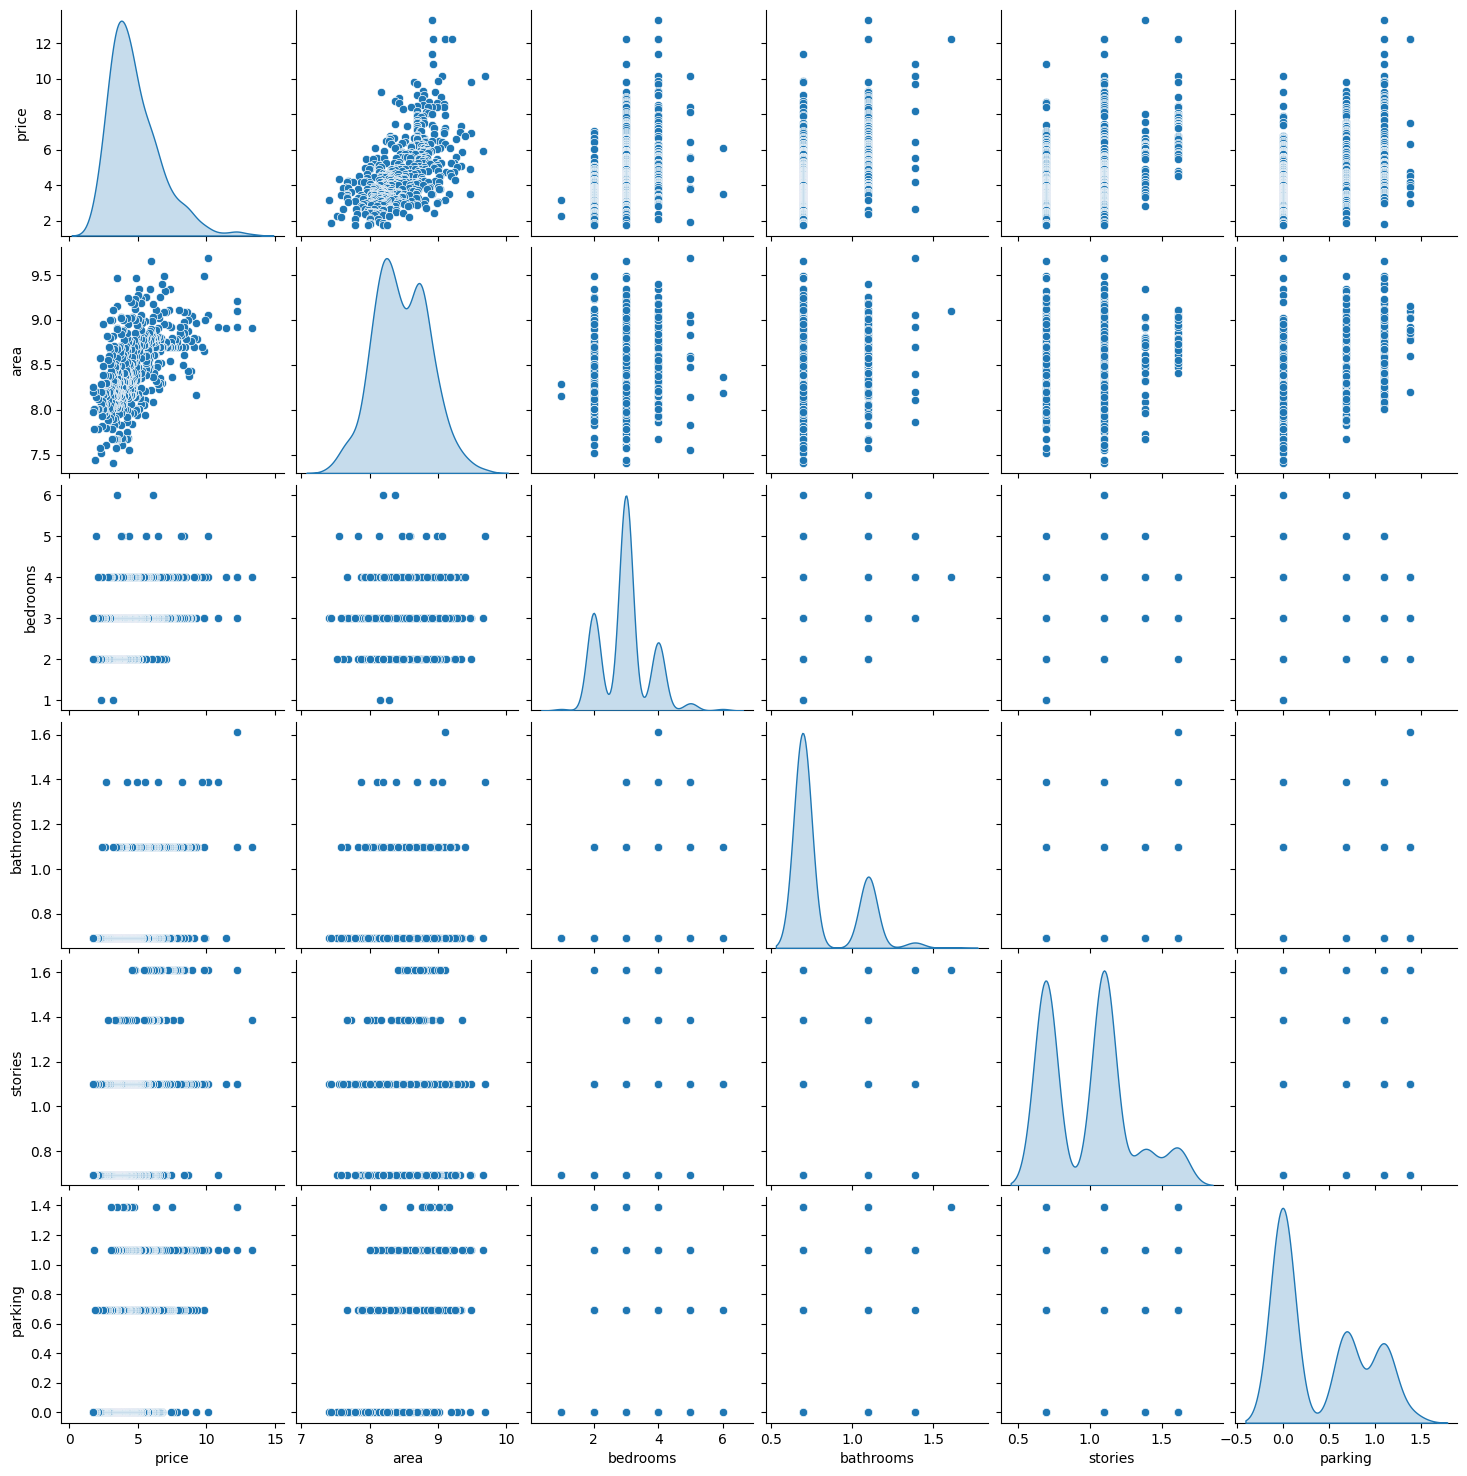

In [25]:
# Create a pairplot
plt.figure(figsize=(7,7))
sns.pairplot(df, diag_kind='kde')
plt.show()

<Figure size 700x700 with 0 Axes>

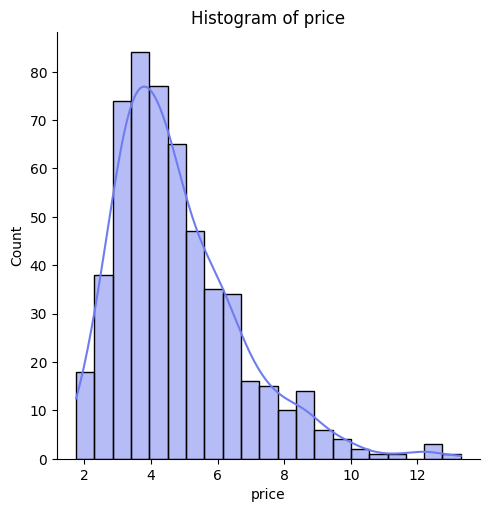

In [26]:
plt.figure(figsize=(7,7))
sns.displot(x=df['price'], kde=True,color='#6F7CEF')
plt.title('Histogram of price')
plt.show()

In [27]:
df['price'].skew()

1.2122388370279793

##### The target variable is also highly postively skewed.Thus,log transformation would be applied to target variable as well.

In [28]:
df['price']=np.log1p(df['price'])

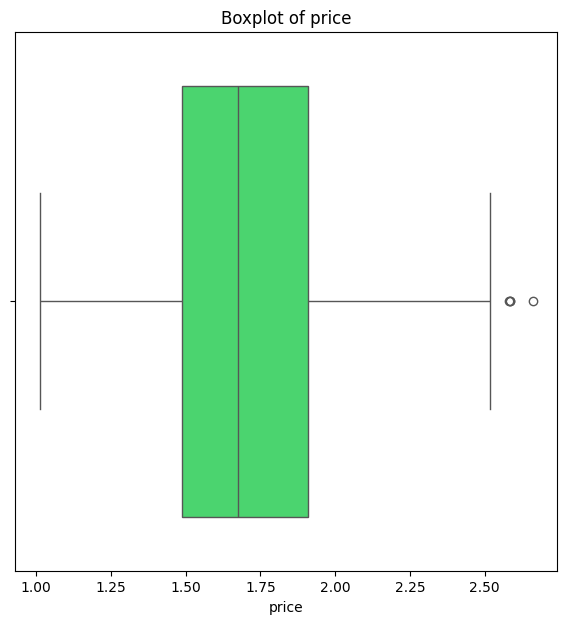

In [29]:
plt.figure(figsize=(7,7))
sns.boxplot(x=df['price'],color='#34eb64')
plt.title('Boxplot of price')
plt.show()

### Feature Engineering

In [30]:
processed_df=df.copy()

In [31]:
#initializing the object of standard scalar and min max scalar
scalar=StandardScaler()

In [32]:
cols_to_scale=['area', 'bathrooms', 'parking', 'stories','bedrooms']
processed_df[cols_to_scale]=scalar.fit_transform(processed_df[cols_to_scale])

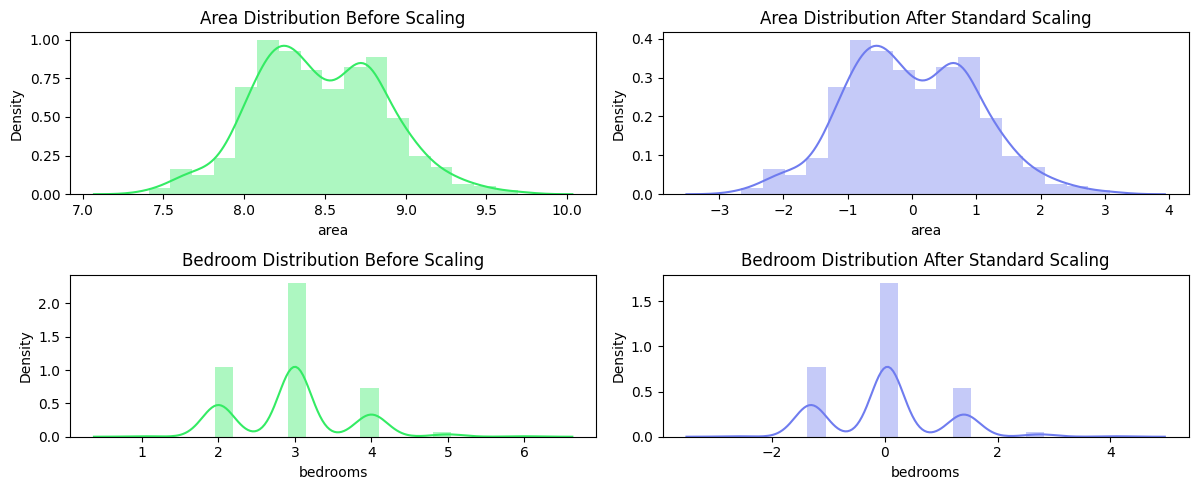

In [33]:
fig, axes = plt.subplots(2,2,figsize=(12, 5))

# Before scaling
axes[0,0].set_title('Area Distribution Before Scaling')
sns.distplot(df['area'], ax=axes[0,0],color="#34eb64")
axes[0,0].set_xlabel("area")

# After scaling
axes[0,1].set_title('Area Distribution After Standard Scaling')
sns.distplot(processed_df['area'], ax=axes[0,1],color="#6F7CEF")
axes[0,1].set_xlabel("area")

# Before scaling
axes[1,0].set_title('Bedroom Distribution Before Scaling')
sns.distplot(df['bedrooms'], ax=axes[1,0],color="#34eb64")
axes[1,0].set_xlabel("bedrooms")


# After scaling
axes[1,1].set_title('Bedroom Distribution After Standard Scaling')
sns.distplot(processed_df['bedrooms'], ax=axes[1,1],color="#6F7CEF")
axes[1,1].set_xlabel("bedrooms")

plt.tight_layout()
plt.show()

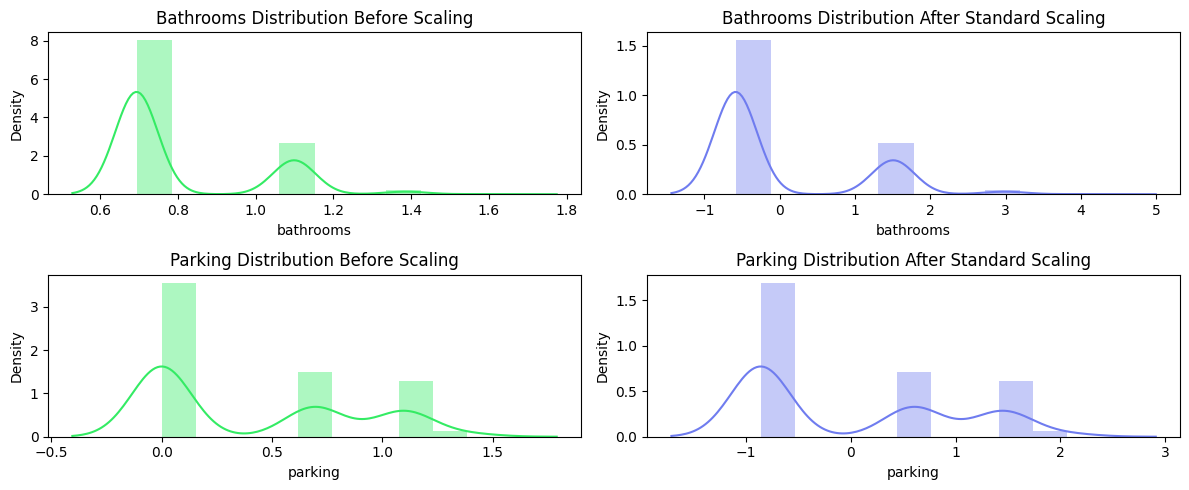

In [34]:
fig, axes = plt.subplots(2,2,figsize=(12, 5))

# Before scaling
axes[0,0].set_title('Bathrooms Distribution Before Scaling')
sns.distplot(df['bathrooms'], ax=axes[0,0],color="#34eb64")
axes[0,0].set_xlabel("bathrooms")

# After scaling
axes[0,1].set_title('Bathrooms Distribution After Standard Scaling')
sns.distplot(processed_df['bathrooms'], ax=axes[0,1],color="#6F7CEF")
axes[0,1].set_xlabel("bathrooms")

# Before scaling
axes[1,0].set_title('Parking Distribution Before Scaling')
sns.distplot(df['parking'], ax=axes[1,0],color="#34eb64")
axes[1,0].set_xlabel("parking")


# After scaling
axes[1,1].set_title('Parking Distribution After Standard Scaling')
sns.distplot(processed_df['parking'], ax=axes[1,1],color="#6F7CEF")
axes[1,1].set_xlabel("parking")

plt.tight_layout()
plt.show()

In [35]:
processed_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,2.660260,1.119332,1.403419,1.505908,1.388655,yes,no,no,no,yes,1.452632,yes,furnished
1,2.583998,1.593323,1.403419,4.139291,2.168106,yes,no,no,no,yes,2.058163,no,furnished
2,2.583998,1.859255,0.047278,1.505908,0.383768,yes,no,yes,no,no,1.452632,yes,semi-furnished
3,2.581353,1.146285,1.403419,1.505908,0.383768,yes,no,yes,no,yes,2.058163,yes,furnished
4,2.518503,1.119332,1.403419,-0.584326,0.383768,yes,yes,yes,no,yes,1.452632,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.036737,-1.156433,-1.308863,-0.584326,-1.032540,yes,no,yes,no,no,1.452632,no,unfurnished
541,1.017818,-1.717125,0.047278,-0.584326,-1.032540,no,no,no,no,no,-0.859797,no,semi-furnished
542,1.011601,-0.684360,-1.308863,-0.584326,-1.032540,yes,no,no,no,no,-0.859797,no,unfurnished
543,1.011601,-1.232970,0.047278,-0.584326,-1.032540,no,no,no,no,no,-0.859797,no,furnished


In [36]:
# Initialize the OneHotEncoder
ohe = OneHotEncoder(drop='first',sparse_output=False)  # drop='first' avoids dummy variable trap

# List of categorical columns to encode
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Apply OneHotEncoder and convert to a DataFrame
encoded_cols = ohe.fit_transform(processed_df[cat_cols])

# Convert the encoded columns into a DataFrame
encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names_out(cat_cols)).astype(int)

# Concatenate with the original DataFrame (excluding the original categorical columns)
processed_df = pd.concat([processed_df.drop(columns=cat_cols), encoded_df], axis=1)

In [37]:
processed_df

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,2.660260,1.119332,1.403419,1.505908,1.388655,1.452632,furnished,1,0,0,0,1,1
1,2.583998,1.593323,1.403419,4.139291,2.168106,2.058163,furnished,1,0,0,0,1,0
2,2.583998,1.859255,0.047278,1.505908,0.383768,1.452632,semi-furnished,1,0,1,0,0,1
3,2.581353,1.146285,1.403419,1.505908,0.383768,2.058163,furnished,1,0,1,0,1,1
4,2.518503,1.119332,1.403419,-0.584326,0.383768,1.452632,furnished,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.036737,-1.156433,-1.308863,-0.584326,-1.032540,1.452632,unfurnished,1,0,1,0,0,0
541,1.017818,-1.717125,0.047278,-0.584326,-1.032540,-0.859797,semi-furnished,0,0,0,0,0,0
542,1.011601,-0.684360,-1.308863,-0.584326,-1.032540,-0.859797,unfurnished,1,0,0,0,0,0
543,1.011601,-1.232970,0.047278,-0.584326,-1.032540,-0.859797,furnished,0,0,0,0,0,0


In [38]:
# Initialize the OrdinalEncoder
oe = OrdinalEncoder(categories=[['unfurnished', 'semi-furnished', 'furnished']])

# Apply OrdinalEncoder to the 'furnishingstatus' column
processed_df['furnishingstatus'] = oe.fit_transform(processed_df[['furnishingstatus']]).astype('int64')

In [39]:
processed_df

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,2.660260,1.119332,1.403419,1.505908,1.388655,1.452632,2,1,0,0,0,1,1
1,2.583998,1.593323,1.403419,4.139291,2.168106,2.058163,2,1,0,0,0,1,0
2,2.583998,1.859255,0.047278,1.505908,0.383768,1.452632,1,1,0,1,0,0,1
3,2.581353,1.146285,1.403419,1.505908,0.383768,2.058163,2,1,0,1,0,1,1
4,2.518503,1.119332,1.403419,-0.584326,0.383768,1.452632,2,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.036737,-1.156433,-1.308863,-0.584326,-1.032540,1.452632,0,1,0,1,0,0,0
541,1.017818,-1.717125,0.047278,-0.584326,-1.032540,-0.859797,1,0,0,0,0,0,0
542,1.011601,-0.684360,-1.308863,-0.584326,-1.032540,-0.859797,0,1,0,0,0,0,0
543,1.011601,-1.232970,0.047278,-0.584326,-1.032540,-0.859797,2,0,0,0,0,0,0


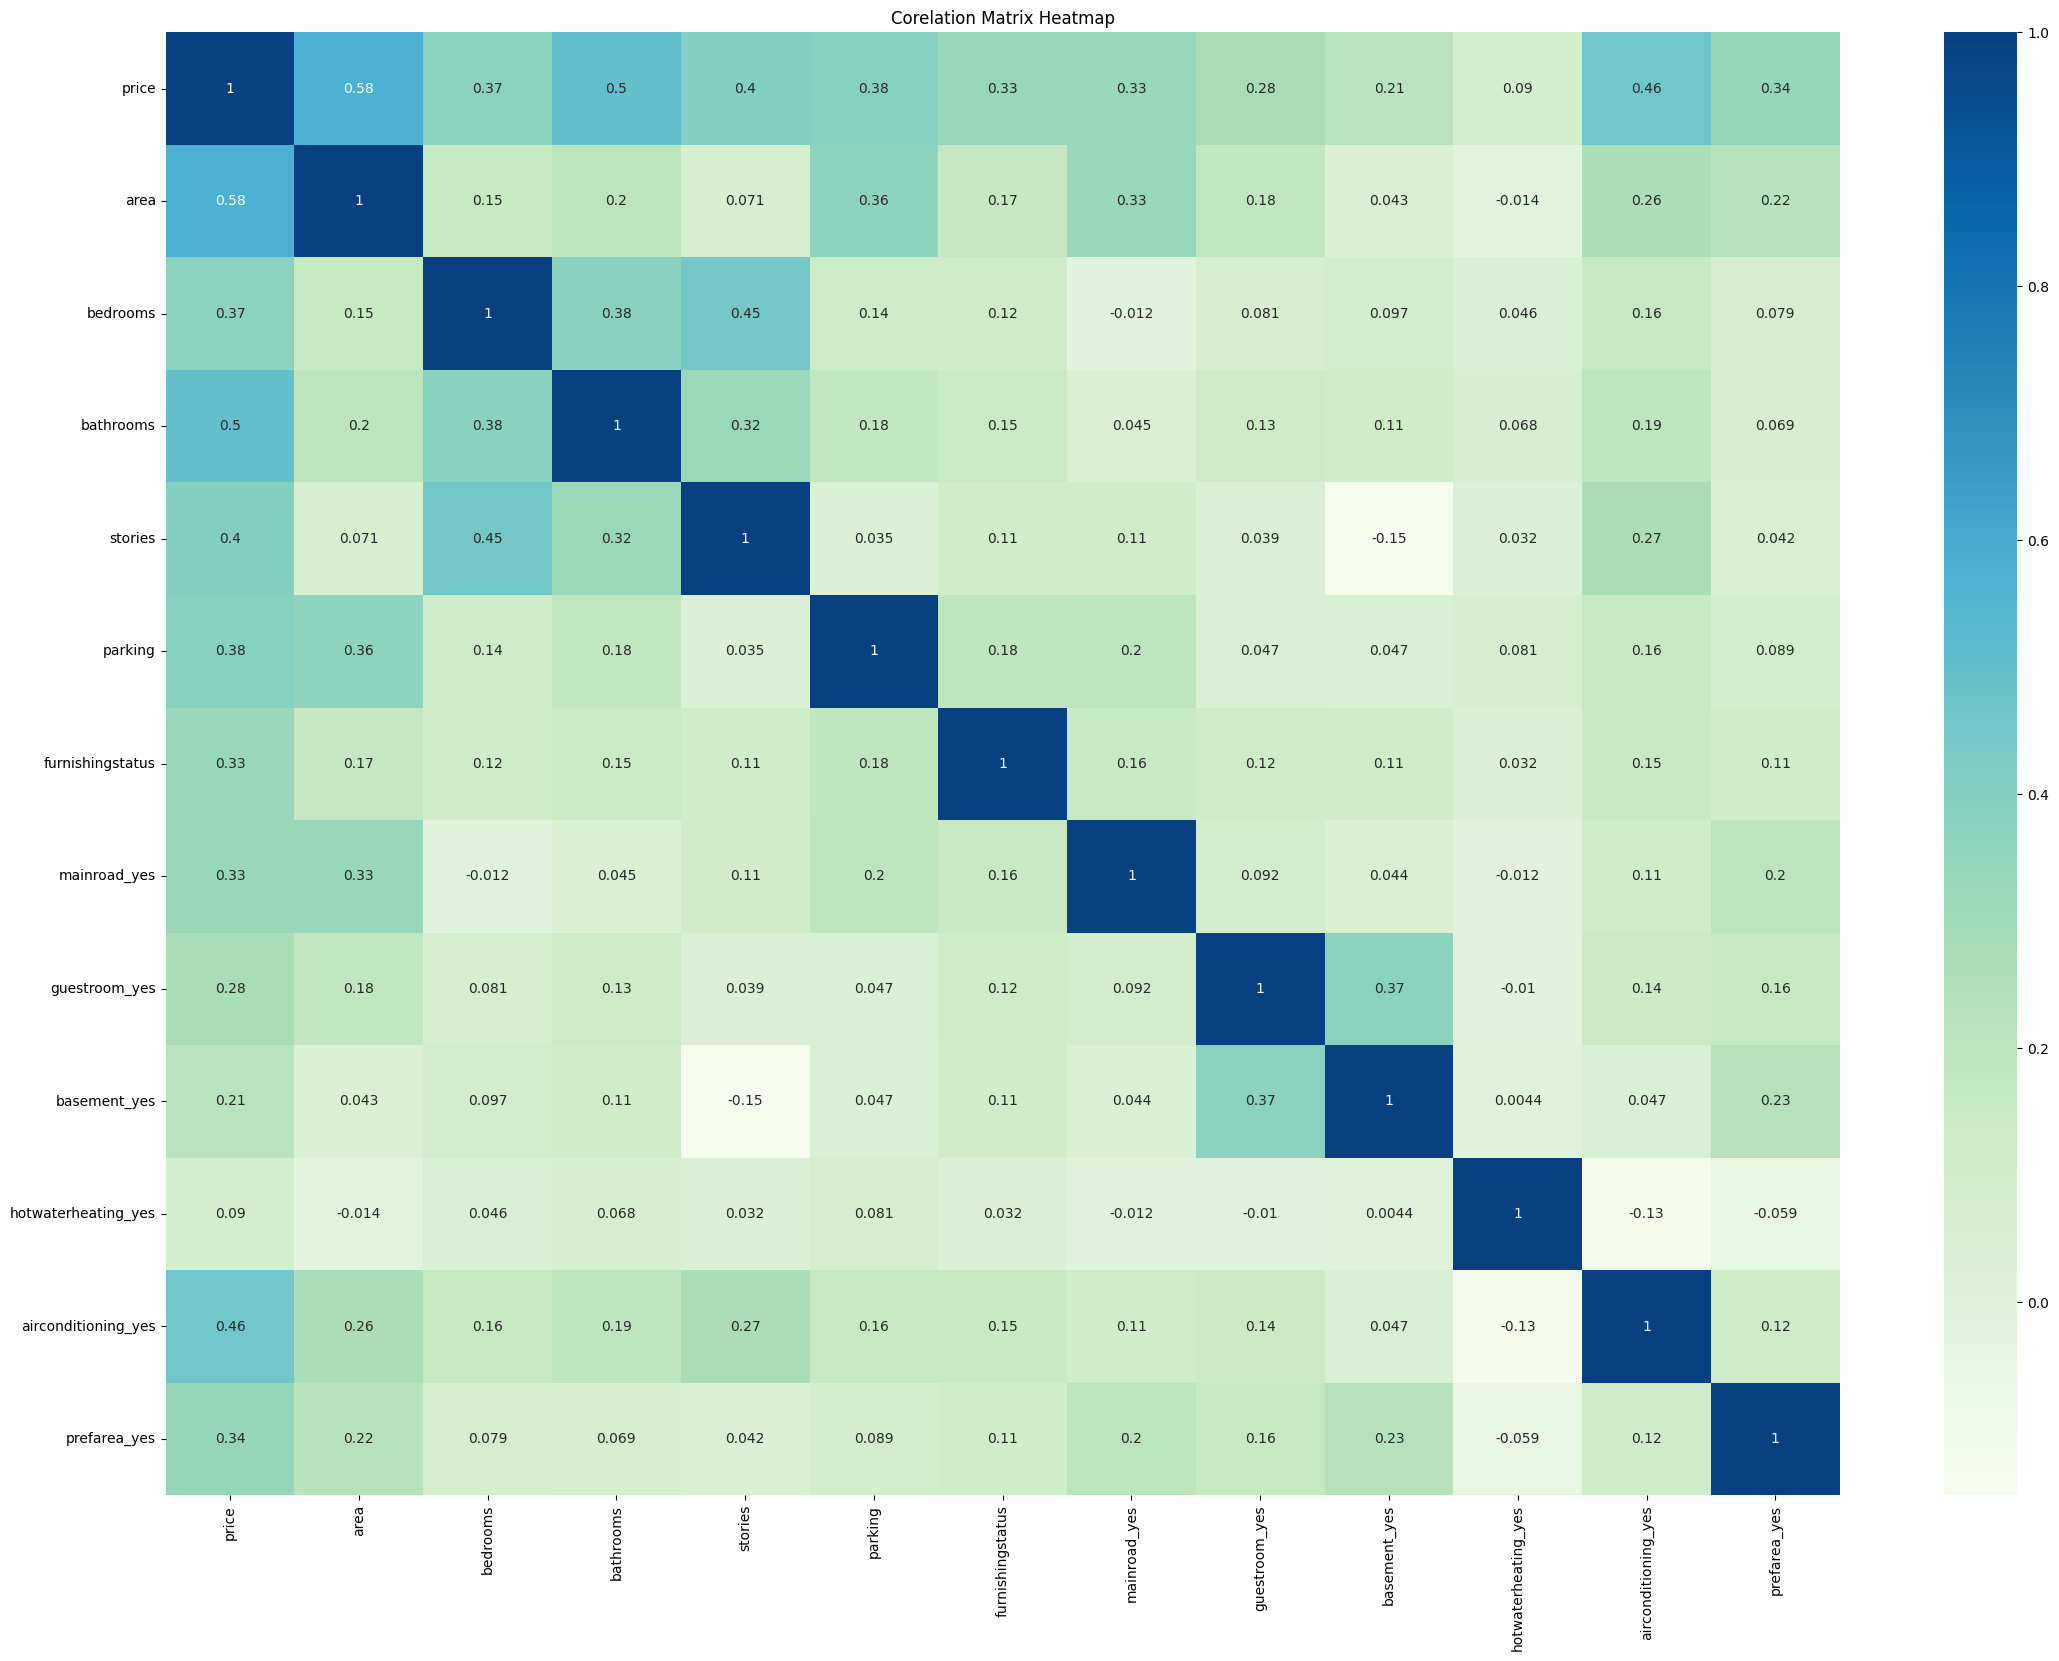

In [40]:
#plotting heatmap to show how columns are related to each other
plt.figure(figsize=(27,19))
corr_matrix=processed_df.corr()
sns.heatmap(processed_df.corr(),annot=True,cmap="GnBu")
plt.title("Corelation Matrix Heatmap")
plt.show()

In [41]:
corr_matrix

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
price,1.000000,0.580350,0.371754,0.497527,0.398794,0.384355,0.333771,0.326063,0.276168,0.213924,0.090450,0.458153,0.340836
area,0.580350,1.000000,0.150463,0.202441,0.070876,0.362641,0.167423,0.331598,0.180186,0.043309,-0.013724,0.262420,0.219716
bedrooms,0.371754,0.150463,1.000000,0.375773,0.450664,0.135729,0.123244,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023
bathrooms,0.497527,0.202441,0.375773,1.000000,0.323327,0.178392,0.148555,0.045215,0.130472,0.105734,0.068211,0.194723,0.069091
stories,0.398794,0.070876,0.450664,0.323327,1.000000,0.035148,0.107452,0.109800,0.038654,-0.152068,0.032448,0.266506,0.041645
parking,0.384355,0.362641,0.135729,0.178392,0.035148,1.000000,0.182399,0.198230,0.046932,0.046847,0.081407,0.159649,0.088673
furnishingstatus,0.333771,0.167423,0.123244,0.148555,0.107452,0.182399,1.000000,0.156726,0.118328,0.112831,0.031628,0.150477,0.107686
mainroad_yes,0.326063,0.331598,-0.012033,0.045215,0.109800,0.198230,0.156726,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876
guestroom_yes,0.276168,0.180186,0.080549,0.130472,0.038654,0.046932,0.118328,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897
basement_yes,0.213924,0.043309,0.097312,0.105734,-0.152068,0.046847,0.112831,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083


In [42]:
# checking the correlation between price and the other features
price_corr=corr_matrix["price"].sort_values(ascending=False)
price_corr

price                  1.000000
area                   0.580350
bathrooms              0.497527
airconditioning_yes    0.458153
stories                0.398794
parking                0.384355
bedrooms               0.371754
prefarea_yes           0.340836
furnishingstatus       0.333771
mainroad_yes           0.326063
guestroom_yes          0.276168
basement_yes           0.213924
hotwaterheating_yes    0.090450
Name: price, dtype: float64

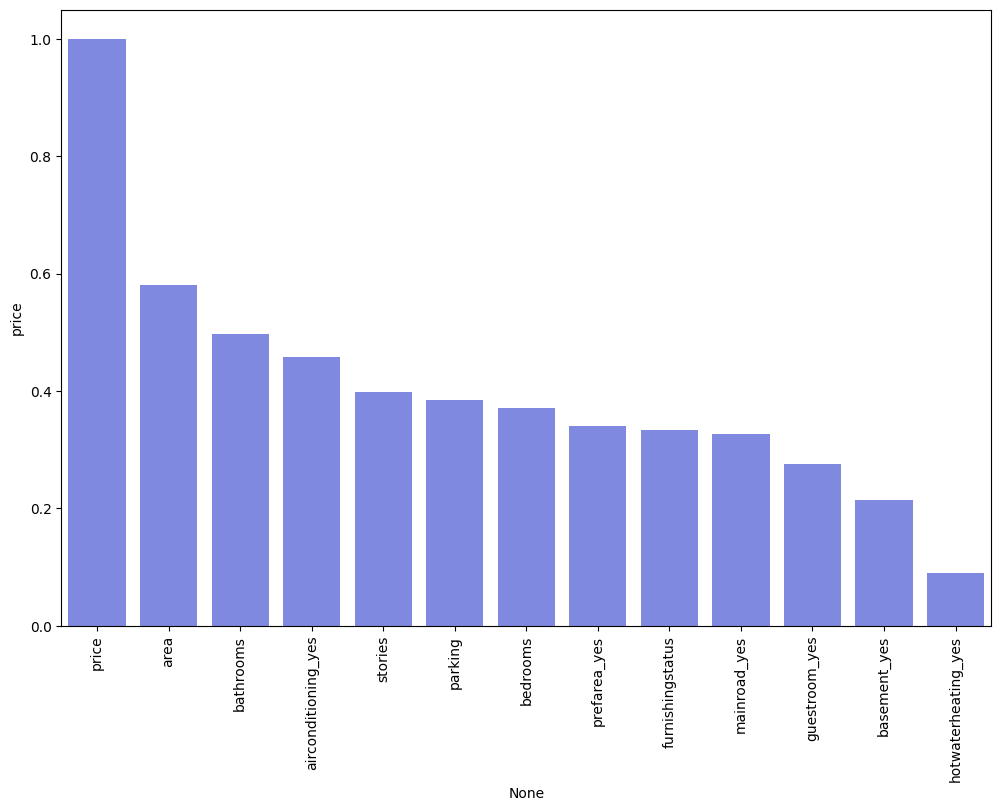

In [43]:
plt.figure(figsize=(12,8))
sns.barplot(x=price_corr.index,y=price_corr,color="#6F7CEF")
plt.xticks(rotation=90)
plt.show()

In [44]:
#Extracting x as input features
X = processed_df.drop('price', axis=1)

#Extracting y as a target variable
y = processed_df['price']

In [45]:
#checking the shape of input features
print(f'shape of input features {X.shape}')
print(f'shape of target features {y.shape}')

shape of input features (545, 12)
shape of target features (545,)


In [46]:
#splitting the dataset in to train set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Feature Importance

In [47]:
# Initialize and fit Random Forest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)
# Get feature importances
feature_importance = model_rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

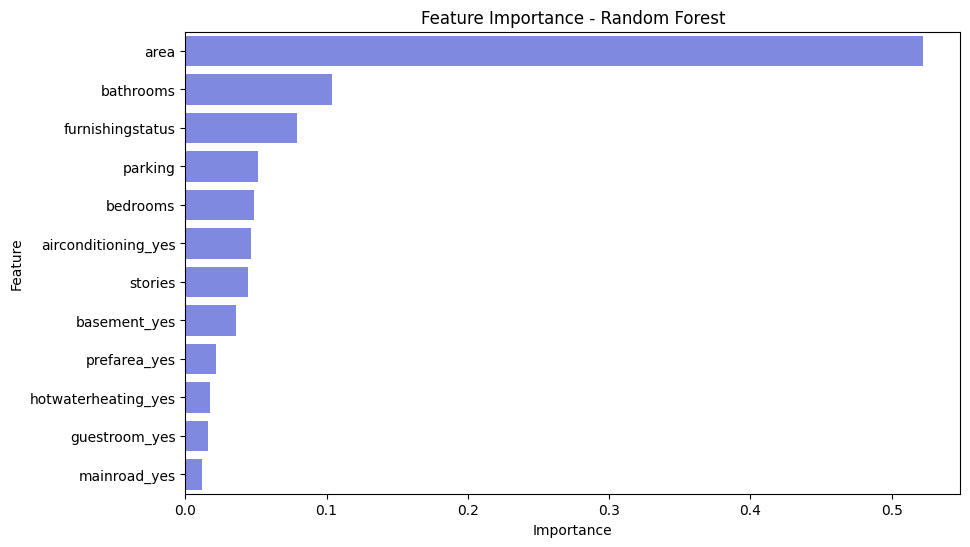

In [48]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color="#6F7CEF")
plt.title('Feature Importance - Random Forest')
plt.show()

In [49]:
# Columns to remove
columns_to_remove = ['mainroad_yes', 'guestroom_yes']

# Remove columns from training and test sets
X_train = X_train.drop(columns=columns_to_remove)
X_test= X_test.drop(columns=columns_to_remove)

In [50]:
print(f'shape of X train {X_train.shape}')
print(f'shape of y train {y_train.shape}')

shape of X train (381, 10)
shape of y train (381,)


### Model Selection

In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(kernel='linear'),
}

### Initial Model Training & Evaluation

In [52]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print('---------------------------------')
    print(f"Model Name: {name}")
    print(f"R-squared Training score: {r2_score(y_train, y_train_pred):.4f}")
    print(f"R-squared Testing score: {r2_score(y_test, y_test_pred):.4f}")
    print('---------------------------------')

---------------------------------
Model Name: Linear Regression
R-squared Training score: 0.7087
R-squared Testing score: 0.6577
---------------------------------
---------------------------------
Model Name: Ridge Regression
R-squared Training score: 0.7087
R-squared Testing score: 0.6569
---------------------------------
---------------------------------
Model Name: Random Forest
R-squared Training score: 0.9498
R-squared Testing score: 0.5979
---------------------------------
---------------------------------
Model Name: Gradient Boosting
R-squared Training score: 0.8631
R-squared Testing score: 0.6456
---------------------------------
---------------------------------
Model Name: Support Vector Regressor
R-squared Training score: 0.7040
R-squared Testing score: 0.6552
---------------------------------


### Hyparameter Tuning

#### Ridge Regression

In [53]:
# Define the parameter grid for Ridge Regression
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Strength of regularization; 
    'max_iter': [1000, 2000, 3000],    # Maximum number of iterations for the solver to converge
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],  # Algorithm to use for optimization
    'tol': [0.0001, 0.001, 0.00001]    # Tolerance for stopping criteria; 
}

# Initialize Ridge Regression model
ridge = Ridge()

# Set up Grid Search for Ridge Regression
ridge_grid = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fit Grid Search
ridge_grid.fit(X_train, y_train)

# Best parameters and score
print(f'Best parameters for Ridge Regression: {ridge_grid.best_params_}')
print(f'Best score for Ridge Regression: {ridge_grid.best_score_}')

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
Best parameters for Ridge Regression: {'alpha': 10, 'max_iter': 1000, 'solver': 'sparse_cg', 'tol': 0.001}
Best score for Ridge Regression: 0.6694300286184158


In [54]:
# Predict values using the best estimator from GridSearchCV
y_pred_ridge = ridge_grid.best_estimator_.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test,y_pred_ridge)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_ridge)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test,y_pred_ridge)

# Print evaluation metrics
print(f'Ridge Regression R2 Score: {r2:.4f}')
print(f'Ridge Regression Mean Squared Error (MSE): {mse:.4f}')
print(f'Ridge Regression Mean Absolute Error (MAE): {mae:.4f}')

Ridge Regression R2 Score: 0.6508
Ridge Regression Mean Squared Error (MSE): 0.0398
Ridge Regression Mean Absolute Error (MAE): 0.1588


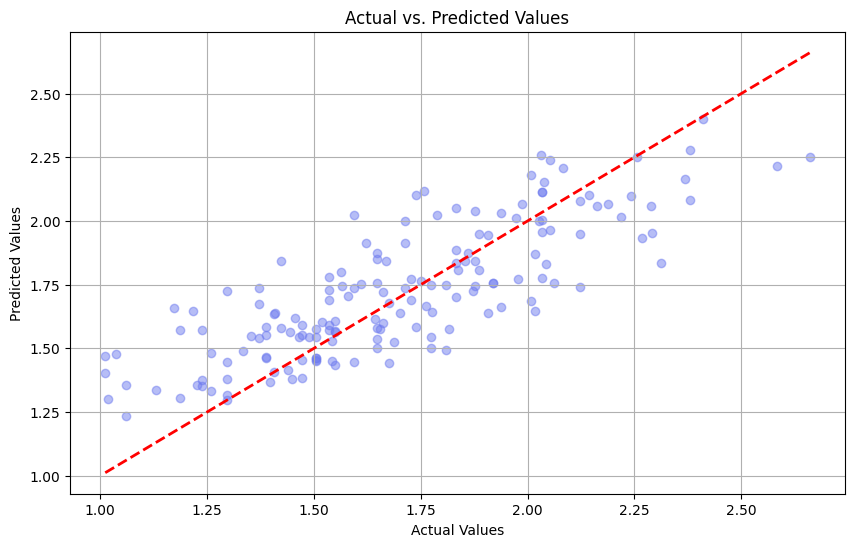

In [55]:
#scatter plot against actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5,color="#6F7CEF")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

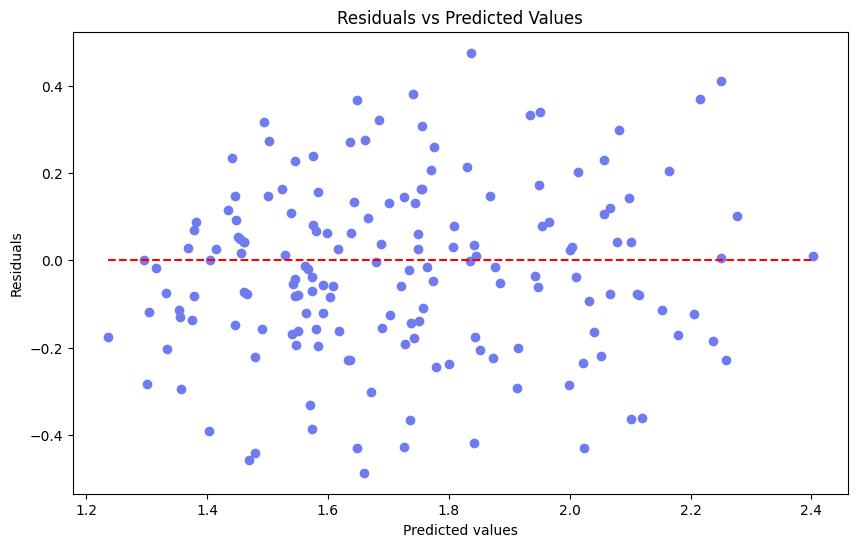

In [56]:
#residual plot against predicted and residuals
plt.figure(figsize=(10,6))
# Calculate residuals
residuals = y_test - y_pred_ridge
# Plot residuals
plt.scatter(y_pred_ridge, residuals,color="#6F7CEF")
plt.hlines(y=0, xmin=min(y_pred_ridge), xmax=max(y_pred_ridge), colors='r', linestyles='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

#### Random Forest

In [57]:
# Define the parameter grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [None, 10, 20],             # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]               # Method of selecting samples for training each tree
}
# Initialize Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Set up Grid Search for Random Forest
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1, verbose=1)
# Fit Grid Search to the training data
rf_grid.fit(X_train, y_train)

# Get the best parameters and the best R-squared score
print(f'Best parameters for Random Forest: {rf_grid.best_params_}')
print(f'Best score during Grid Search: {rf_grid.best_score_}')

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best score during Grid Search: 0.6287179172009838


In [58]:
# Predict values using the best estimator from GridSearchCV
y_pred_rf = rf_grid.best_estimator_.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred_rf)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_rf)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)

# Print evaluation metrics
print(f'Random Forest R2 Score: {r2:.4f}')
print(f'Random Forest Mean Squared Error (MSE): {mse:.4f}')
print(f'Random Forest Mean Absolute Error (MAE): {mae:.4f}')

Random Forest R2 Score: 0.6005
Random Forest Mean Squared Error (MSE): 0.0455
Random Forest Mean Absolute Error (MAE): 0.1662


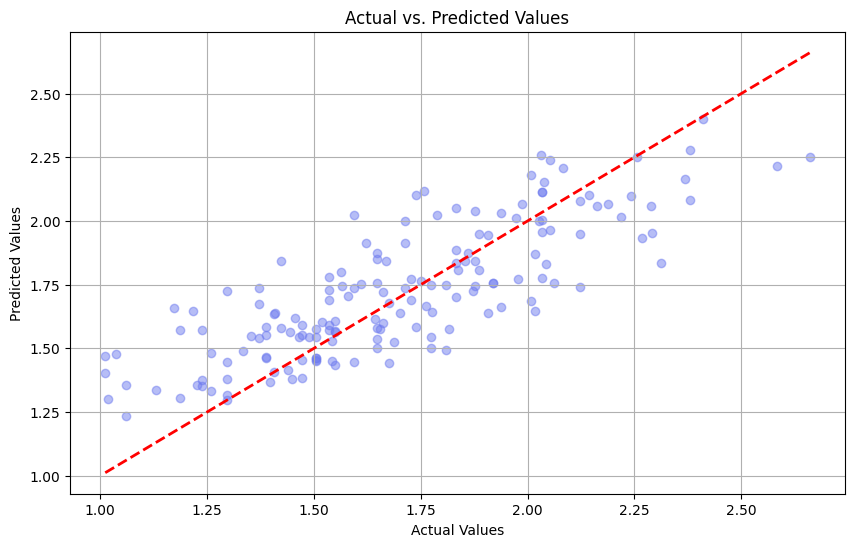

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5,color="#6F7CEF")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

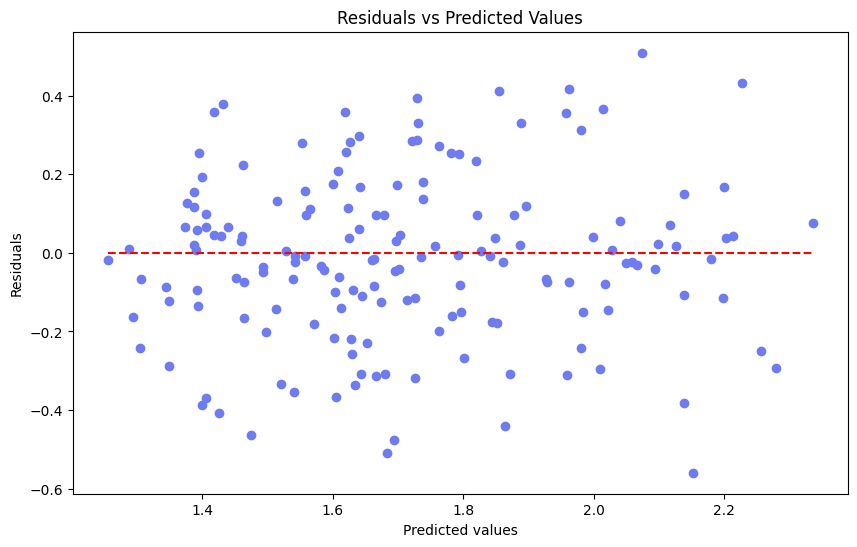

In [60]:
plt.figure(figsize=(10, 6))
# Calculate residuals
residuals = y_test - y_pred_rf
# Plot residuals
plt.scatter(y_pred_rf, residuals,color="#6F7CEF")
plt.hlines(y=0, xmin=min(y_pred_rf), xmax=max(y_pred_rf), colors='r', linestyles='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

#### Gradient Boosting

In [61]:
param_grid_gb = {
    'n_estimators': [100, 200,250,300],            # Number of boosting stages
    'learning_rate': [0.0001,0.001,0.01],         # Step size shrinkage
    'max_depth': [None,3, 5, 7,9],                    # Maximum depth of the individual regression estimators
    'subsample': [0.7, 0.8, 1.0]             # Fraction of samples used for fitting the individual base learners
            
}
# Initialize Gradient Boosting Regressor model
gb = GradientBoostingRegressor(random_state=42)

# Set up Grid Search for Gradient Boosting
gb_grid = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='r2', n_jobs=-1, verbose=1)
# Fit Grid Search to the training data
gb_grid.fit(X_train, y_train)

# Get the best parameters and the best R-squared score
print(f'Best parameters for Gradient Boosting: {gb_grid.best_params_}')
print(f'Best score during Grid Search: {gb_grid.best_score_}')

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}
Best score during Grid Search: 0.6356411457035149


In [62]:
y_pred_gb = gb_grid.best_estimator_.predict(X_test)
# Calculate R-squared score
r2 = r2_score(y_test, y_pred_gb)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_gb)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_gb)

# Print evaluation metrics
print(f'Gradient Boosting R2 Score: {r2:.4f}')
print(f'Gradient Boosting Mean Squared Error (MSE): {mse:.4f}')
print(f'Gradient Boosting Mean Absolute Error (MAE): {mae:.4f}')

Gradient Boosting R2 Score: 0.6239
Gradient Boosting Mean Squared Error (MSE): 0.0428
Gradient Boosting Mean Absolute Error (MAE): 0.1581


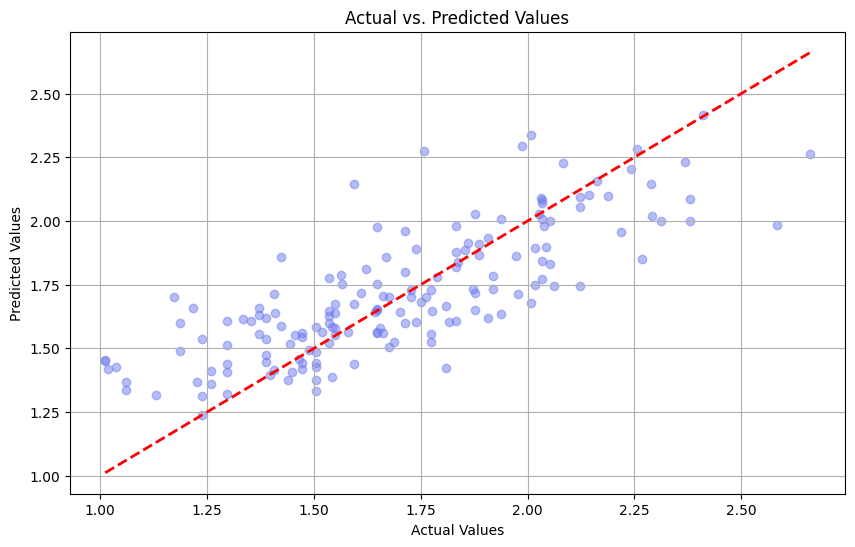

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5,color="#6F7CEF")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

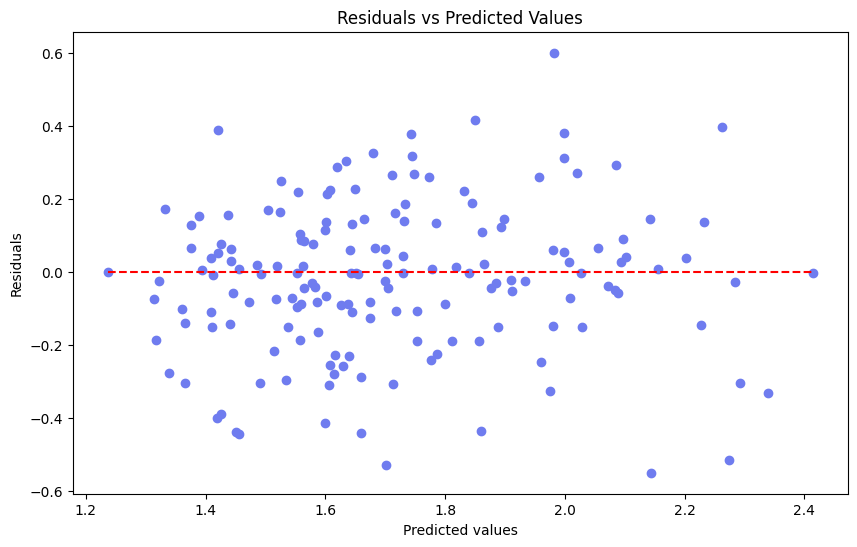

In [64]:
plt.figure(figsize=(10,6))
# Calculate residuals
residuals = y_test - y_pred_gb
# Plot residuals
plt.scatter(y_pred_gb, residuals,color="#6F7CEF")
plt.hlines(y=0, xmin=min(y_pred_gb), xmax=max(y_pred_gb), colors='r', linestyles='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

#### SVR

In [65]:
param_grid_svr = {
    'C': [0.1, 1, 10, 100],                   # Regularization parameter
    'epsilon': [0.1, 0.2, 0.5],               # Epsilon in the epsilon-SVR model
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']                # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
}
# Initialize Support Vector Regressor model
svr = SVR()

# Set up Grid Search for SVR
svr_grid = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=5, scoring='r2', n_jobs=-1, verbose=1)
# Fit Grid Search to the scaled training data
svr_grid.fit(X_train, y_train)

# Get the best parameters and the best R-squared score
print(f'Best parameters for SVR: {svr_grid.best_params_}')
print(f'Best score during Grid Search: {svr_grid.best_score_}')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for SVR: {'C': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best score during Grid Search: 0.6713364694696086


In [66]:
# Predict values using the best estimator from GridSearchCV
y_pred_svr = svr_grid.best_estimator_.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred_svr)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_svr)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_svr)

# Print evaluation metrics
print(f'Support Vector R2 Score: {r2:.4f}')
print(f'Support Vector Mean Squared Error (MSE): {mse:.4f}')
print(f'Support Vector Mean Absolute Error (MAE): {mae:.4f}')

Support Vector R2 Score: 0.6552
Support Vector Mean Squared Error (MSE): 0.0393
Support Vector Mean Absolute Error (MAE): 0.1566


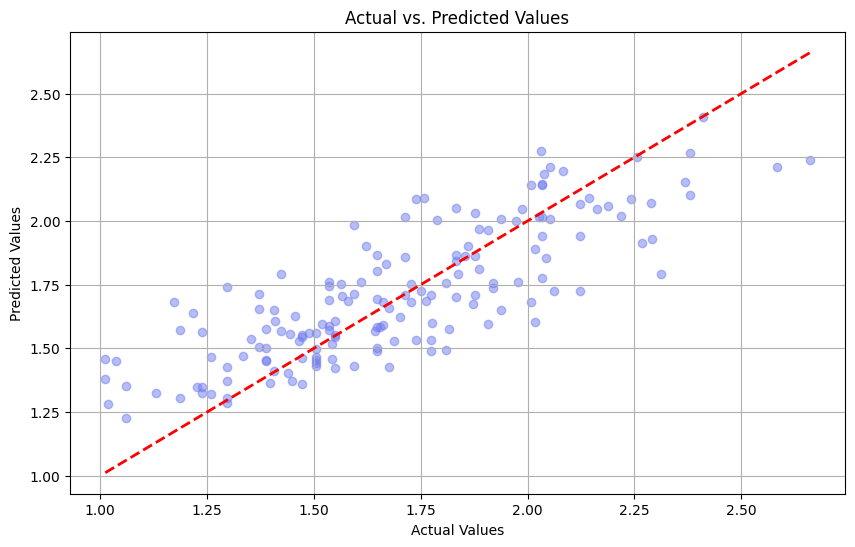

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5,color="#6F7CEF")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Line of equality
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

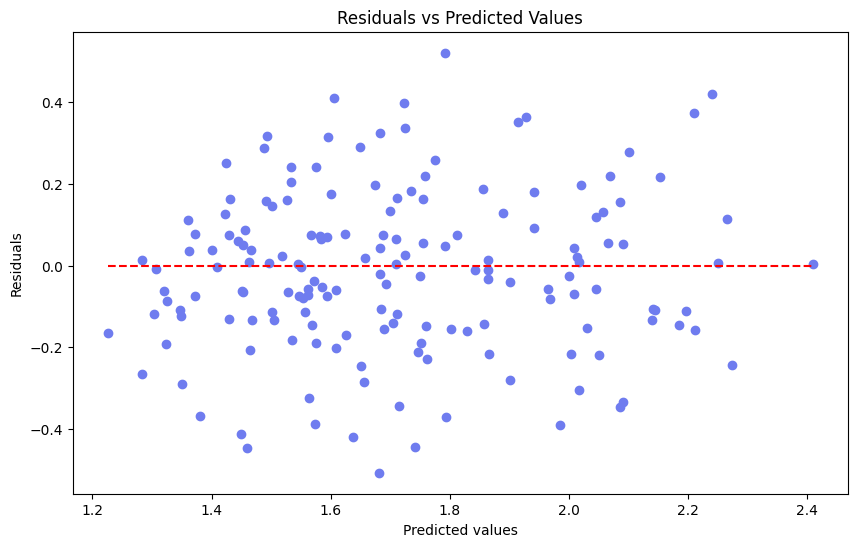

In [68]:
plt.figure(figsize=(10,6))
# Calculate residuals
residuals = y_test - y_pred_svr
# Plot residuals
plt.scatter(y_pred_svr, residuals,color="#6F7CEF")
plt.hlines(y=0, xmin=min(y_pred_svr), xmax=max(y_pred_svr), colors='r', linestyles='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [69]:
prediction_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_svr})
prediction_df.head(10)

,Actual,Predicted
316,1.621366,1.901227
77,2.034706,2.144228
360,1.549688,1.422596
90,2.006871,1.683442
493,1.335001,1.468621
209,1.774952,1.533149
176,1.832581,1.842871
249,1.712536,2.016427
516,1.238374,1.347594
426,1.470865,1.359563


### Model Interpretation

In [70]:
shap.initjs()
# Get the best estimator from GridSearchCV
best_svr = svr_grid.best_estimator_
# Create a Explainer object
explainer = shap.Explainer(best_svr,X_test)

# Calculate SHAP values
shap_values = explainer(X_test)
print(shap_values)

.values =
array([[ 0.05617073,  0.00920233,  0.11010608, ..., -0.00182648,
        -0.03534877, -0.02584889],
       [ 0.08375288,  0.00052089,  0.11010608, ..., -0.00182648,
         0.07176871,  0.08185483],
       [-0.05167776, -0.00816055, -0.06538154, ..., -0.00182648,
        -0.03534877, -0.02584889],
       ...,
       [-0.02672323,  0.00920233,  0.23461653, ..., -0.00182648,
        -0.03534877, -0.02584889],
       [ 0.17643371,  0.00052089, -0.06538154, ..., -0.00182648,
        -0.03534877, -0.02584889],
       [-0.08058638,  0.00052089,  0.11010608, ..., -0.00182648,
        -0.03534877, -0.02584889]])

.base_values =
array([1.7284831, 1.7284831, 1.7284831, 1.7284831, 1.7284831, 1.7284831,
       1.7284831, 1.7284831, 1.7284831, 1.7284831, 1.7284831, 1.7284831,
       1.7284831, 1.7284831, 1.7284831, 1.7284831, 1.7284831, 1.7284831,
       1.7284831, 1.7284831, 1.7284831, 1.7284831, 1.7284831, 1.7284831,
       1.7284831, 1.7284831, 1.7284831, 1.7284831, 1.7284831, 1.72848

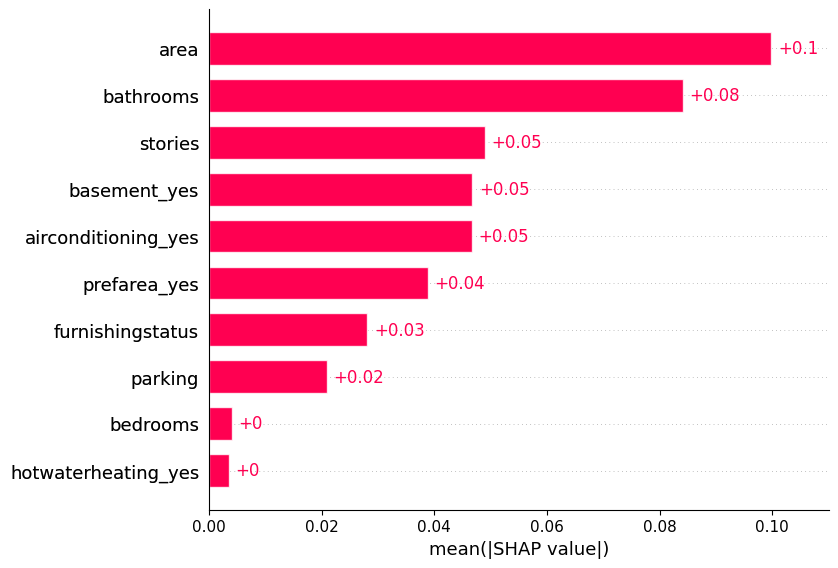

In [71]:
shap.plots.bar(shap_values,max_display=12)

### Insights
- The top most important features that are driving the prediction are area,bathrooms and stories.
- The least important features are bedrooms and hotwaterheating_yes.

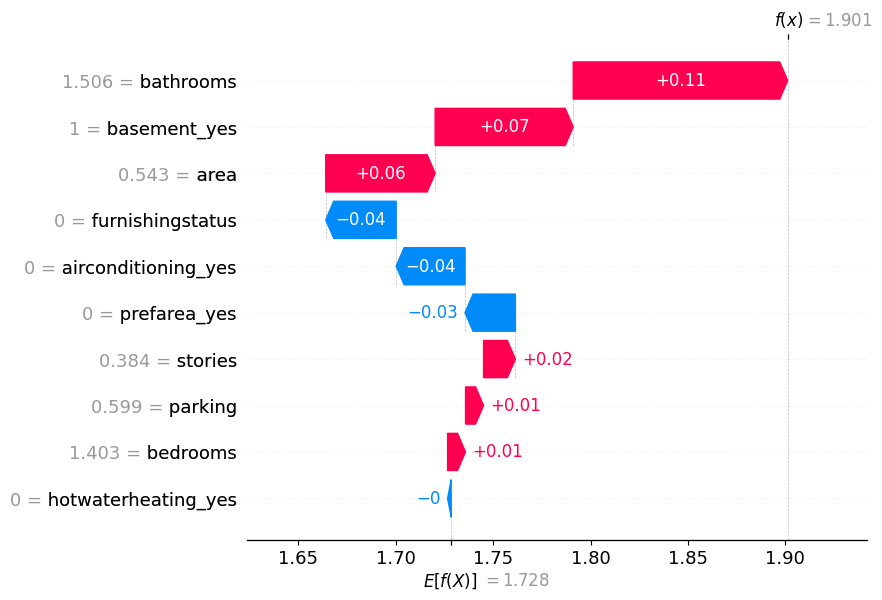

In [72]:
shap.plots.waterfall(shap_values[0])

### Insights
- For the first observation ,the features that positively drive the prediction meaning these features were the reason to increase the price of house are bathrooms ,basement_yes ,area,stories,parking and bedrooms.
- The features that negatively drive the predictions are furnishingstatus,airconditioning_yes and prefarea_yes.

In [73]:
shap.plots.force(shap_values[1])

### Insights
For the second observation ,basement_yes and parking is having a negative impact towards prediction whereas all the other columns have a positive impact .

In [74]:
import pickle


filename = 'svr_model.pkl'  

# Save the model to disk using pickle
with open(filename, 'wb') as file:
    pickle.dump(svr_grid, file)

print(f'Model saved as {filename}')

Model saved as svr_model.pkl
